In [1]:
import pandas as pd
data = pd.read_csv('data/iris.csv',encoding='latin1')

In [2]:
print(len(data)) # 총 샘플의 개수 출력
print(data[:5]) # 샘플 중 5개 출력

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# 3개의 클래스 k=3
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


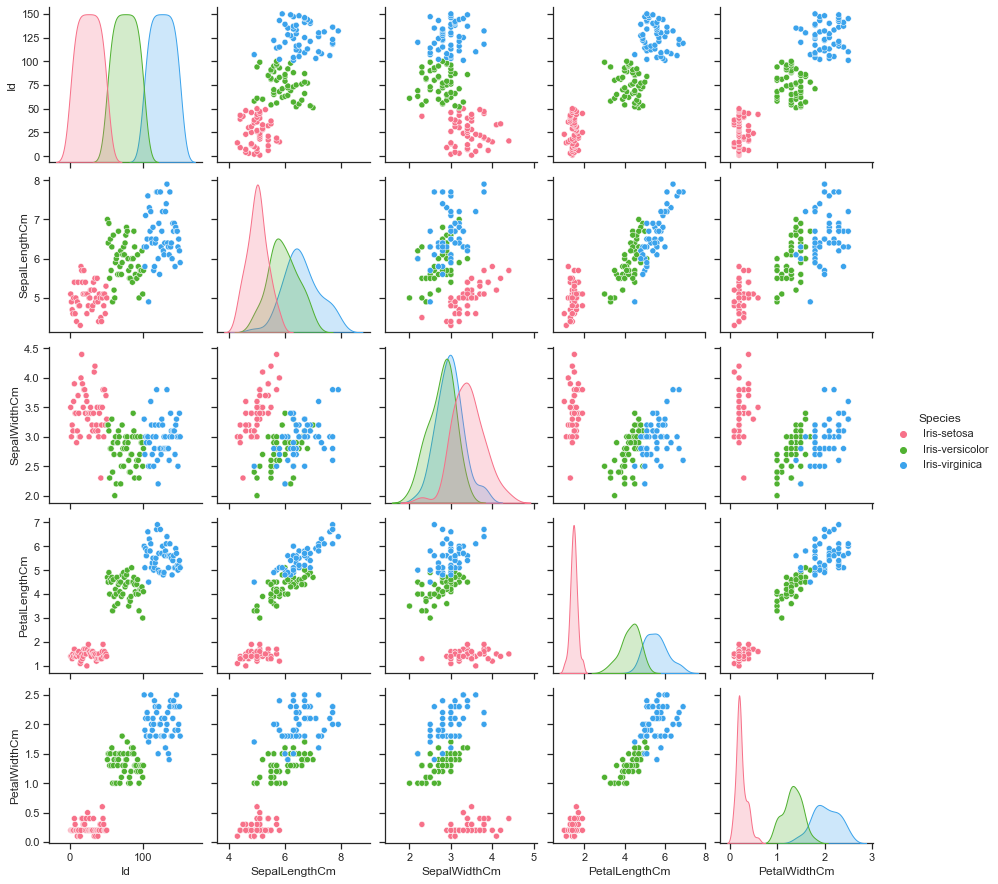

In [5]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

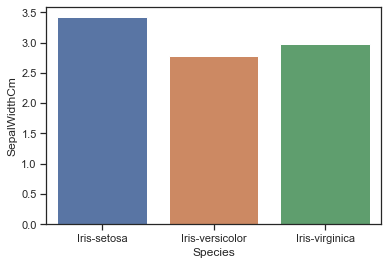

In [7]:
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)
# 각 종과 특성에 대한 연관 관계

<AxesSubplot:>

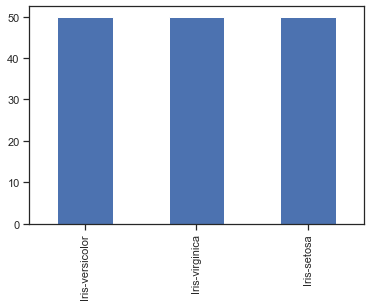

In [8]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

<AxesSubplot:>

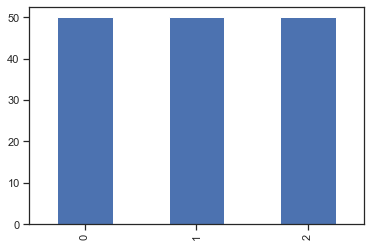

In [9]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'].value_counts().plot(kind='bar')

In [10]:
from sklearn.model_selection import train_test_split
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['Species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [12]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 2.8603 - accuracy: 0.3667 - val_loss: 2.9563 - val_accuracy: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 766us/step - loss: 2.1321 - accuracy: 0.3583 - val_loss: 2.2849 - val_accuracy: 0.2000
Epoch 3/200
120/120 [==============================] - 0s 625us/step - loss: 1.9041 - accuracy: 0.3417 - val_loss: 2.0425 - val_accuracy: 0.2333
Epoch 4/200
120/120 [==============================] - 0s 632us/step - loss: 1.7791 - accuracy: 0.2833 - val_loss: 1.9079 - val_accuracy: 0.2333
Epoch 5/200
120/120 [==============================] - 0s 626us/step - loss: 1.6766 - accuracy: 0.2917 - val_loss: 1.7888 - val_accuracy: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 607us/step - loss: 1.5753 - accuracy: 0.3000 - val_loss: 1.6759 - val_accuracy: 0.2333
Epoch 7/200
120/120 [==============================] - 0s 703us/step - loss: 1.4850 - accuracy: 0.2833 - val_loss: 1.5726 - val_accu

120/120 [==============================] - 0s 683us/step - loss: 0.3828 - accuracy: 0.9333 - val_loss: 0.4087 - val_accuracy: 0.8000
Epoch 58/200
120/120 [==============================] - 0s 687us/step - loss: 0.3800 - accuracy: 0.8833 - val_loss: 0.3985 - val_accuracy: 0.8333
Epoch 59/200
120/120 [==============================] - 0s 654us/step - loss: 0.3766 - accuracy: 0.9333 - val_loss: 0.3923 - val_accuracy: 0.9000
Epoch 60/200
120/120 [==============================] - 0s 650us/step - loss: 0.3717 - accuracy: 0.9167 - val_loss: 0.3912 - val_accuracy: 0.8333
Epoch 61/200
120/120 [==============================] - 0s 702us/step - loss: 0.3679 - accuracy: 0.9250 - val_loss: 0.3984 - val_accuracy: 0.8333
Epoch 62/200
120/120 [==============================] - 0s 651us/step - loss: 0.3657 - accuracy: 0.9167 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 63/200
120/120 [==============================] - 0s 648us/step - loss: 0.3624 - accuracy: 0.9333 - val_loss: 0.4042 - val_accuracy

120/120 [==============================] - 0s 620us/step - loss: 0.2510 - accuracy: 0.9500 - val_loss: 0.2839 - val_accuracy: 0.9667
Epoch 114/200
120/120 [==============================] - 0s 679us/step - loss: 0.2501 - accuracy: 0.9417 - val_loss: 0.2825 - val_accuracy: 0.9667
Epoch 115/200
120/120 [==============================] - 0s 730us/step - loss: 0.2498 - accuracy: 0.9417 - val_loss: 0.2712 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 790us/step - loss: 0.2466 - accuracy: 0.9417 - val_loss: 0.2672 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 744us/step - loss: 0.2473 - accuracy: 0.9417 - val_loss: 0.2719 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 792us/step - loss: 0.2450 - accuracy: 0.9500 - val_loss: 0.2884 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 0s 794us/step - loss: 0.2429 - accuracy: 0.9583 - val_loss: 0.2657 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 791us/step - loss: 0.1881 - accuracy: 0.9500 - val_loss: 0.2058 - val_accuracy: 1.0000
Epoch 170/200
120/120 [==============================] - 0s 840us/step - loss: 0.1871 - accuracy: 0.9500 - val_loss: 0.2124 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 714us/step - loss: 0.1865 - accuracy: 0.9500 - val_loss: 0.2086 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 622us/step - loss: 0.1866 - accuracy: 0.9583 - val_loss: 0.2078 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 762us/step - loss: 0.1844 - accuracy: 0.9500 - val_loss: 0.2039 - val_accuracy: 1.0000
Epoch 174/200
120/120 [==============================] - 0s 674us/step - loss: 0.1846 - accuracy: 0.9500 - val_loss: 0.2021 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 567us/step - loss: 0.1829 - accuracy: 0.9500 - val_loss: 0

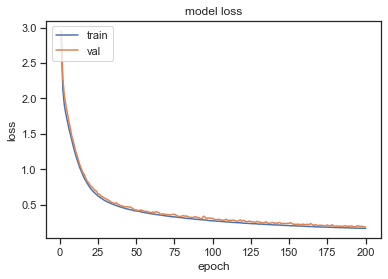

In [13]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 206ms/step - loss: 0.1863 - accuracy: 1.0000

 테스트 정확도: 1.0000
